In [1]:
import os
os.chdir("D:\\Course code")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Age'>

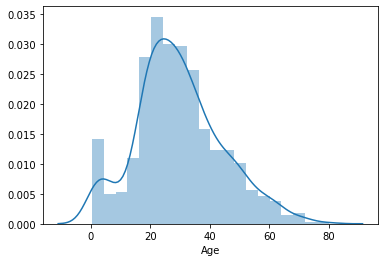

In [20]:
import seaborn as sns
sns.distplot(df['Age'])

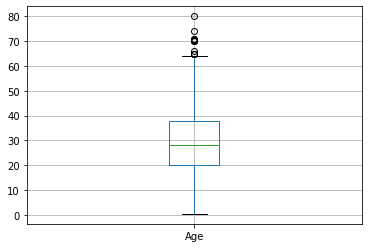

In [19]:
#### Plotting boxplot for seeing outliers
figure = df.boxplot(column='Age')

<AxesSubplot:>

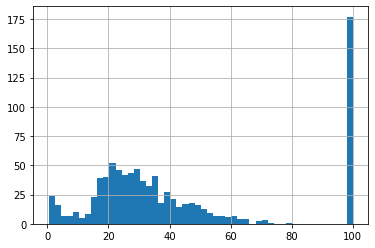

In [22]:
#### we can create outliers as follows
df['Age_filled'] = df['Age'].fillna(100)
df['Age_filled'].hist(bins=50)

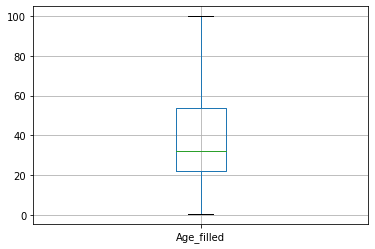

In [24]:
figure = df.boxplot(column = 'Age_filled')

In [27]:
#### Now we can see the upper and lower boundaries

upper_boundary = df['Age'].mean() + 3*df['Age'].std()
lower_boundary = df['Age'].mean() - 3*df['Age'].std()

print(lower_boundary, upper_boundary)
#### For gaussian distribution uptil here is good enough

-13.88037434994331 73.27860964406095


#### For skewed data
1. do calculate IQR
2. then do below steps of immediate outliers and extreme outliers for skewed data

<AxesSubplot:xlabel='Fare'>

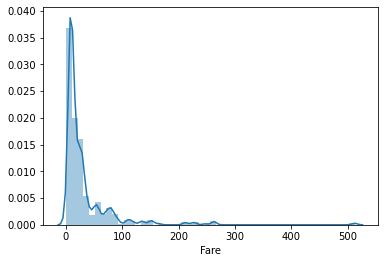

In [33]:
#### Data visualization
sns.distplot(df['Fare'])
#### WE can see data is right skewed

<AxesSubplot:>

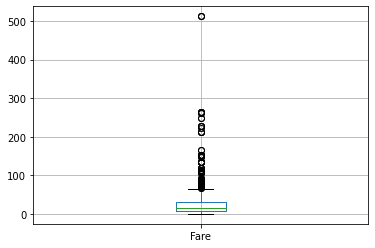

In [34]:
#### Boxplot
df.boxplot(column = 'Fare')
#### Here we can see the outliers

In [35]:
#### Now we can compute the IQR(interquantile range)

IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
print(IQR)

23.0896


In [36]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [37]:
#### Immediate outliers(*1.5)

upper_bridge = df.Fare.quantile(0.75) + (IQR*1.5)
lower_bridge = df.Fare.quantile(0.25) - (IQR*1.5)
print(upper_bridge, lower_bridge)

65.6344 -26.724


In [38]:
#### Extreme outliers(*3)

upper_bridge = df.Fare.quantile(0.75) + (IQR*3)
lower_bridge = df.Fare.quantile(0.25) - (IQR*3)

print(upper_bridge, lower_bridge)

#### Everything above 100 can be considered as outliers

100.2688 -61.358399999999996


<AxesSubplot:>

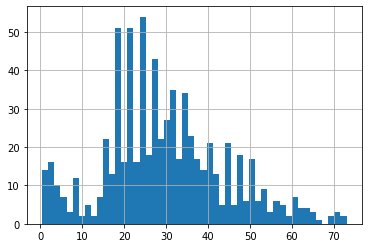

In [39]:
#### Handling outliers for age
data = df.copy()
data.loc[data['Age']>=73, 'Age'] = 73
data['Age'].hist(bins=50)


<AxesSubplot:>

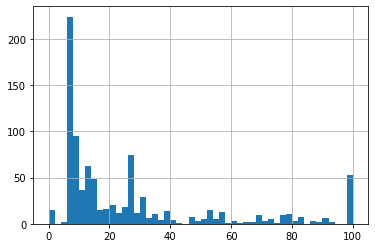

In [41]:
#### Handling fare outliers
data.loc[data['Fare']>=100, 'Fare'] = 100
data['Fare'].hist(bins=50)

